<font size=6><b>Lec01 : 금융관련 API 활용 </b></font>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)


# 증시 정보 관련 

<img src="https://avatars.githubusercontent.com/u/34187310?v=4">

## PyKRX
* 웹 사이트 (Naver/KRX)에서 주가 정보 스크래핑
* fnguide가 제공 -> naver 크롤링을 대신 해주는 기능 -> 네이버에 문제가 생기면 안됨
* <font size = 4> pykrx의 주식만 볼 수있음(한국만)

* <font size = 6>ref : https://github.com/sharebook-kr/pykrx

----
* <b>주식(stock)</b>과 관련된 api와 <b>채권(bond)</b> 관련 api가 나뉘어져있음
    * STOCK : MarketData, 인덱스, 공매도
    * ETX : ETF, ETN, ELW
    * 채권
    * 채권 수익률
    * 기타

In [2]:
# ! pip install pykrx

In [2]:
from pykrx import stock # 주식
from pykrx import bond  # 채권

* Stock 모듈 - MarketData API
    - ticker : 기업명이나 종목코드를 의미
    - 상장폐지된 것을 걸러주지 않음 -> 거래 가격이 0 이면 상장폐지

In [49]:
tickers = stock.get_market_ticker_list("202201")   # 2021-01 해당 일자 코스피 상장된 ticker
print(tickers[:5])

['095570', '006840', '027410', '282330', '138930']


### 상장 기업의 수 (상장폐지 포함)

In [59]:
tickers = stock.get_market_ticker_list("2023-01", market="ALL")
len(tickers)

2690

In [62]:
tickers = stock.get_market_ticker_list("2023-01", market="KOSPI")  # 전체에 대략 30프로 차지
len(tickers)

943

In [58]:
tickers = stock.get_market_ticker_list("2023-01", market="KOSDAQ")
len(tickers)

1615

In [61]:
tickers = stock.get_market_ticker_list("2023-01", market="KONEX")
len(tickers)

132

### KONEX : 상장을 앞둔 비상장주

In [5]:
tickers = stock.get_market_ticker_list("20190225", market="KOSDAQ") # market : ALL, KOSPI, KOSDAQ, KONEX
print(tickers[:5])

['060310', '054620', '265520', '211270', '035760']


In [6]:
종목명 = stock.get_market_ticker_name('035760')
print(종목명)

CJ ENM


In [7]:
df = stock.get_market_ohlcv("2018-04-28", "2018-05-10", "005930")  
print(df.head(3))

            시가  고가  저가     종가  거래량  거래대금  등락률
날짜                                           
2018-04-30   0   0   0  53000    0     0  0.0
2018-05-02   0   0   0  53000    0     0  0.0
2018-05-03   0   0   0  53000    0     0  0.0


- ohlcv : 시작가, 고가, 저가, 종가, 거래량  +  그외 , dataframe 으로 던져줌

In [66]:
df = stock.get_market_ohlcv("2018") 
# ---------------------------------------------------------------------------------------------
# df = stock.get_market_ohlcv("2018","2019") --- XXXX기간을 정해놓은 경우 무조건 종목코드가 필요함
# df = stock.get_market_price_change("20180301", "20180320")  # ---price_change로는 종목 코드 없이 전체 가져오기 가능
# ---------------------------------------------------------------------------------------------
print(df.head(3))

        시가  고가  저가  종가  거래량  거래대금  등락률
티커                                    
095570   0   0   0   0    0     0  0.0
068400   0   0   0   0    0     0  0.0
006840   0   0   0   0    0     0  0.0


### stock.get_market_price_change

In [70]:
df = stock.get_market_price_change("20180301", "20180320")
df.head(2)

,종목명,시가,종가,변동폭,등락률,거래량,거래대금
티커,,,,,,,
095570,AJ네트웍스,7550,7130,-420,-5.56,384948,2844218890
068400,AJ렌터카,10900,12100,1200,11.01,3410074,40045884150


### stock.get_business_days(년,월)

In [8]:
stock.get_business_days(2022, 2)[:3]

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00')]

* 해당 날짜 기준 종목 정보
* 대상 : etf, elw, market, index

In [10]:
stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]

['095570', '006840', '027410']

### stock.get_market_fundamental('20230404')

In [68]:
df = stock.get_market_fundamental("20220401")
print(df.head(2))

          BPS  PER   PBR  EPS   DIV  DPS
티커                                      
095570   6089  0.0  1.12    0  3.09  210
006840  50471  0.0  0.45    0  1.75  400


* PyKRX : 네이버 주가정보 크롤링 정보 제공

In [12]:
import time
ticker_list = stock.get_market_ticker_list(date='202201', market='KOSPI')[:3]
for ticker in ticker_list:
    print(stock.get_market_ticker_name(ticker))
    df = stock.get_market_ohlcv("20181210", "20181212", ticker)
    print(df.head())
    print("----" * 20)
    time.sleep(1)      #------ 무작위 크롤링시 차단 주의 

AJ네트웍스
              시가    고가    저가    종가     거래량       거래대금   등락률
날짜                                                         
2018-12-10  4840  4840  4670  4750   32310  152157715 -2.06
2018-12-11  4685  4750  4585  4585   37975  175311205 -3.47
2018-12-12  4605  4605  4520  4540  102752  466242595 -0.98
--------------------------------------------------------------------------------
AK홀딩스
               시가     고가     저가     종가    거래량        거래대금   등락률
날짜                                                             
2018-12-10  55400  56200  54900  55800  28618  1583487700  0.72
2018-12-11  55800  56200  54900  55100  24302  1343526800 -1.25
2018-12-12  55400  55900  54900  55900  13179   733026700  1.45
--------------------------------------------------------------------------------
BGF
              시가    고가    저가    종가     거래량        거래대금   등락률
날짜                                                          
2018-12-10  7900  8000  7830  7900  103028   813870860 -1.25
2018-12-11  7900  

### get_index_.... : 코스피 지수에 해당하는 것들
<pre>
1001 코스피
1028 코스피 200
1034 코스피 100
1035 코스피 50
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1244 코스피200제외 코스피지수
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업
1027 제조업
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%

In [11]:
stock.get_index_ticker_list(date='202201', market='KOSPI')[:3]

['1001', '1002', '1003']

- 나머지 기능은 get_market_과 비슷함

* 공매도 : krs에서 빌려서 주식을 매도 한 뒤 떨어지면 다시 구매해서 값음

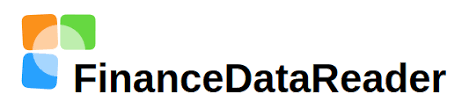

## FinanceDataReader
* 수정 종가(Adjusted Price) : 총 발행 주식수의 변화를 반영한 가격
* 백테스트, 수익률 분석 시 반드시!!! 수정주가 사용  -->  주가 연속성 보장
* <font color=red><b>FinanceDataReader 모든 가격을 수정가격(Adjusted Price)로 제공</b></font><br><br>
* ref : https://github.com/FinanceData/FinanceDataReader

* Indexes: 'KS11'(코스피지수), 'KQ11'(코스닥지수), 'DJI'(다우존스지수), 'IXIC'(나스닥지수), 'US500'(S&P 500지수) 

In [13]:
# ! pip install finance-datareader

* 2018년 5월 4일, 삼성전자는 50:1로 액면분할

In [71]:
import FinanceDataReader as fdr

In [72]:
print(stock.get_market_ticker_name('005930'))
df = fdr.DataReader('005930', '2018-04-28', '2018-05-10', exchange='KRX') # 거래소
df.head(10)

삼성전자


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-04-30,0,0,0,53000,0,0.000000
2018-05-02,0,0,0,53000,0,0.000000
2018-05-03,0,0,0,53000,0,0.000000
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752


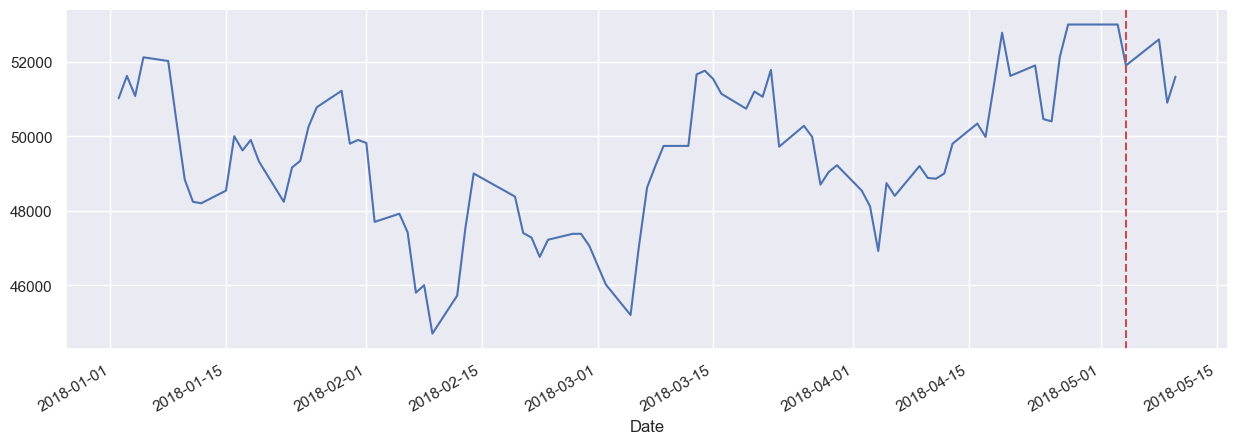

In [73]:
df = fdr.DataReader('005930', '2018-01-01', '2018-05-10')
ax = df['Close'].plot(figsize=(15,5))
ax.axvline('2018-05-04', ls='--', color='r')

In [1]:
#------------------------------------------------------------
# FX 환율, 1995 ~ 현재
#------------------------------------------------------------
# usdkrw = fdr.DataReader('USD/KRW', '2022-01-01') # 달러 원화
# usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
# usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화


#------------------------------------------------------------
# 상품 선물 가격 데이터
#------------------------------------------------------------
# df = fdr.DataReader('NG') # NG 천연가스 선물 (NYMEX)
# df = fdr.DataReader('ZG') # 금 선물 (ICE)
# df = fdr.DataReader('ZI') # 은 선물 (ICE)
# df = fdr.DataReader('HG') # 구리 선물 (COMEX)


#------------------------------------------------------------
# Bitcoin KRW price (Bithumbs), 2016 ~ Now
#------------------------------------------------------------
# btc = fdr.DataReader('BTC/KRW', '2016-01-01')

#------------------------------------------------------------
# 채권 수익률
#------------------------------------------------------------
# df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
# df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률
# df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
# df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

#------------------------------------------------------------
# stock symbol list
#------------------------------------------------------------
# stock_df = fdr.StockListing('KRX')   # 코스피, 코스닥, 코넥스 전체
# stock_df = fdr.StockListing('KOSPI') # 코스피
# stock_df = fdr.StockListing('KOSDAQ') # 코스닥
# stock_df = fdr.StockListing('KONEX') # 코넥스
# stock_df = fdr.StockListing('NYSE')   # 뉴욕거래소
# stock_df = fdr.StockListing('NASDAQ') # 나스닥
# stock_df = fdr.StockListing('AMEX')   # 아멕스
# stock_df = fdr.StockListing('S&P500')
# stock_df = fdr.StockListing('SSE') # 상해 거래소
# stock_df = fdr.StockListing('SZSE') # 신천 거래소
# stock_df = fdr.StockListing('HKEX') # 홍콩거래소
# stock_df = fdr.StockListing('TSE') # 도쿄 증권거래소
# stock_df = fdr.StockListing('HOSE') # 호치민 증권거래소
# stock_df = fdr.StockListing('KRX-ADMINISTRATIVE') # 관리종목 리스트
# stock_df = fdr.StockListing('KRX-DELISTING')  # -----------상장폐지 종목 전체 리스트

#------------------------------------------------------------
# FRED 연준 데이터
#------------------------------------------------------------ 
# m2 = fdr.DataReader('M2', data_source='fred')                        #M2통화량
# nq = fdr.DataReader('NASDAQCOM', data_source='fred')                 # NASDAQCOM 나스닥종합지수
# hou_nas = fdr.DataReader(['HSN1F', 'NASDAQCOM'], data_source='fred') # HSN1F 주택판매지수, NASDAQCOM 나스닥종합지수 


* 캔들차트 

In [2]:
# ! pip install --upgrade bokeh==2.4.3
# df = fdr.DataReader('005930', '2022-01-01', '2022-02-15')

# my_config = {'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
#           # 'width': 600, 
#           # 'height': 300,
#           'volume': True,
# }
# fdr.chart.config(config=my_config)
# fdr.chart.plot(df) #, title='삼성전자(005930)')

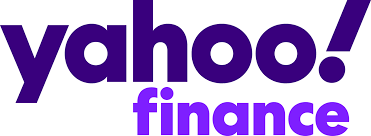

## yahoo finance
* ref : https://github.com/ranaroussi/yfinance/
* ref : https://pypi.org/project/yfinance/

In [29]:
# ! pip install yfinance
# XXXXX #! pip install yahoo-finance  <구버전>

In [20]:
import yfinance as yf

In [24]:
msft = yf.Ticker("AAPL")

# get stock info
# print(msft.info) # {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014',...

# get historical market data
hist = msft.history(period="min") # 최근주가
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-25 00:00:00-04:00,165.190002,166.309998,163.729996,163.770004,48534900,0.0,0.0


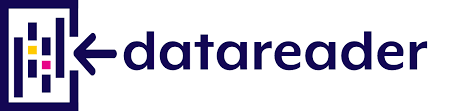

## pandas_datareader

In [25]:
# ! pip install pandas_datareader

In [26]:
from pandas_datareader import data as pdr

* 종목 코드 에러
- 데이터를 받아오는 일에 문제가 생겨서 크롤링으로 데이터를 받아오면 가능
- yfinance 와 pandas_datareader 를 붙여서 써야 함
- ref : https://growing-sub.tistory.com/14

In [47]:
import pandas
from pandas_datareader import data as pdr
yf.pdr_override()  # yf을 이동해준다? #에러날때 사용

df_ss = pdr.get_data_yahoo("005930.KS", '2018-01-01', '2019-12-31')
df_ms = pdr.get_data_yahoo('MSFT', '2018-01-01', '2019-12-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [81]:
df_ss.info()
df_ss.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 490 entries, 2018-01-02 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       490 non-null    float64
 1   High       490 non-null    float64
 2   Low        490 non-null    float64
 3   Close      490 non-null    float64
 4   Adj Close  490 non-null    float64
 5   Volume     490 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,51380.0,51400.0,50780.0,51020.0,43994.203125,8474250
2018-01-03,52540.0,52560.0,51420.0,51620.0,44511.582031,10013500
2018-01-04,52120.0,52180.0,50640.0,51080.0,44045.941406,11695450
2018-01-05,51300.0,52120.0,51200.0,52120.0,44942.714844,9481150
2018-01-08,52400.0,52520.0,51500.0,52020.0,44856.492188,8383650


# 기술적 지표 관련 

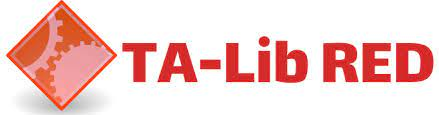

## TA-LIB

TA-LIB download ( TA_Lib‑0.4.24‑cp38‑cp38‑win_amd64.whl )
* ref : https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
* ref : https://github.com/mrjbq7/ta-lib

In [ ]:
# ! pip install TA_Lib-0.4.24-cp38-cp38-win_amd64.whl

### RSI(상대 강도 지수): RSI가 클수록 상승추세가 큼, 작을수록 하락추세가 작음

In [31]:
import talib
import numpy
c = numpy.random.randn(100)

print(talib.STOCHRSI(c))

rsi = talib.RSI(c)
print(talib.STOCHF(rsi, rsi, rsi))
print(talib.RSI(c))


(array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
        10.55179224, 100.        ,  14.71150342,  26.61945068,
        42.91237834,  73.51677581,  79.06067541,   6.74900761,
        57.83501757, 100.        ,  21.37402437,  20.22692843,
        60.69610174,   8.66833005,   0.        ,  60.51064945,
        20.10065062, 100.        , 100.        ,  91.92406692,
        46.40817662,  14.30204828,   0.        ,   0.        ,
       100.        ,  49.7735379 ,  23.09629905,   5.95103825,
        21.88755999,  43.2313096 , 100.        ,  55.55164619,
        66.14409252,  52.29497518,   0.        ,   0.        ,
       100.        ,  19.07223327,  60.29822771,   0.        ,
        74.8736303 ,  60.63679862,  72.45984416,  68.9

# 증시 달력 관련
* https://open.krx.co.kr/contents/MKD/01/0110/01100305/MKD01100305.jsp
* https://github.com/rsheftel/pandas_market_calendars
* https://github.com/quantopian/trading_calendars
* https://github.com/gerrymanoim/exchange_calendars

## pykrx

In [33]:
from pykrx import stock
stock.get_business_days(2022, 2) # 2월의 비지니스데이

[Timestamp('2022-02-03 00:00:00'),
 Timestamp('2022-02-04 00:00:00'),
 Timestamp('2022-02-07 00:00:00'),
 Timestamp('2022-02-08 00:00:00'),
 Timestamp('2022-02-09 00:00:00'),
 Timestamp('2022-02-10 00:00:00'),
 Timestamp('2022-02-11 00:00:00'),
 Timestamp('2022-02-14 00:00:00'),
 Timestamp('2022-02-15 00:00:00'),
 Timestamp('2022-02-16 00:00:00'),
 Timestamp('2022-02-17 00:00:00'),
 Timestamp('2022-02-18 00:00:00'),
 Timestamp('2022-02-21 00:00:00'),
 Timestamp('2022-02-22 00:00:00'),
 Timestamp('2022-02-23 00:00:00'),
 Timestamp('2022-02-24 00:00:00'),
 Timestamp('2022-02-25 00:00:00'),
 Timestamp('2022-02-28 00:00:00')]

## pandas_market_calendars
* https://github.com/rsheftel/pandas_market_calendars/blob/master/docs/usage.rst

In [82]:
# ! pip install pandas_market_calendars

     ---------------------------------------- 0.0/98.9 kB ? eta -:--:--
     ---------------------------------------- 98.9/98.9 kB 5.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from datetime import time
import pandas as pd
import pandas_market_calendars as mcal

In [84]:
xkrx = mcal.get_calendar('XKRX')
xkrx.discontinued_market_times
print(xkrx.has_discontinued)
xkrx.remove_time("break_start")
xkrx.remove_time("break_end")
print(xkrx.has_discontinued)
cal_df = xkrx.schedule("2022-02-22", "2022-02-24")
cal_df.head()

True
False


,market_open,market_close
2022-02-22,2022-02-22 00:00:00+00:00,2022-02-22 06:30:00+00:00
2022-02-23,2022-02-23 00:00:00+00:00,2022-02-23 06:30:00+00:00
2022-02-24,2022-02-24 00:00:00+00:00,2022-02-24 06:30:00+00:00


## exchange_calendars
* ref : https://github.com/gerrymanoim/exchange_calendars

In [ ]:
# ! pip install exchange_calendars

In [85]:
import exchange_calendars as xcals 
import datetime
import pandas as pd
print( xcals.get_calendar_names(include_aliases=False))

krx = xcals.get_calendar("XKRX") 
print(krx.is_session("2022-02-20"))   #일료일
print(krx.is_session(datetime.date.today().strftime("%Y-%m-%d"))) #오늘   개장여부

cal_df = krx.schedule.loc["2022-02-23":"2022-02-25"]
cal_df.head()


['24/5', '24/7', 'AIXK', 'ASEX', 'BVMF', 'CMES', 'IEPA', 'XAMS', 'XASX', 'XBKK', 'XBOG', 'XBOM', 'XBRU', 'XBSE', 'XBUD', 'XBUE', 'XCBF', 'XCSE', 'XDUB', 'XETR', 'XFRA', 'XHEL', 'XHKG', 'XICE', 'XIDX', 'XIST', 'XJSE', 'XKAR', 'XKLS', 'XKRX', 'XLIM', 'XLIS', 'XLON', 'XMAD', 'XMEX', 'XMIL', 'XMOS', 'XNYS', 'XNZE', 'XOSL', 'XPAR', 'XPHS', 'XPRA', 'XSES', 'XSGO', 'XSHG', 'XSTO', 'XSWX', 'XTAE', 'XTAI', 'XTKS', 'XTSE', 'XWAR', 'XWBO', 'us_futures']
False
True


,open,break_start,break_end,close
2022-02-23,2022-02-23 00:00:00+00:00,NaT,NaT,2022-02-23 06:30:00+00:00
2022-02-24,2022-02-24 00:00:00+00:00,NaT,NaT,2022-02-24 06:30:00+00:00
2022-02-25,2022-02-25 00:00:00+00:00,NaT,NaT,2022-02-25 06:30:00+00:00


In [38]:
cal_df = krx.sessions_in_range("2022-01-01", "2022-01-10")
cal_df

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10'],
              dtype='datetime64[ns]', freq='C')

In [39]:
print("이전개장일", krx.previous_session("2022-02-21")) #월요일
print("다음개장일", krx.next_session("2022-02-21"))     #

이전개장일 2022-02-18 00:00:00
다음개장일 2022-02-22 00:00:00


In [96]:
! ecal XKRX 1 2022

        January 2022
 Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]
[ 2]  3   4   5   6   7 [ 8]
[ 9] 10  11  12  13  14 [15]
[16] 17  18  19  20  21 [22]
[23] 24  25  26  27  28 [29]
[30][31]



C:\AI\pythonProject\venv\lib\site-packages\exchange_calendars\ecal.py:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  days = pd.date_range(start, end, closed="left")


In [97]:
! ecal XKRX 2022

                                          2022
          January                        February                        March
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                        [ 1]           [ 1][ 2]  3   4 [ 5]           [ 1]  2   3   4 [ 5]
[ 2]  3   4   5   6   7 [ 8]   [ 6]  7   8   9  10  11 [12]   [ 6]  7   8 [ 9] 10  11 [12]
[ 9] 10  11  12  13  14 [15]   [13] 14  15  16  17  18 [19]   [13] 14  15  16  17  18 [19]
[16] 17  18  19  20  21 [22]   [20] 21  22  23  24  25 [26]   [20] 21  22  23  24  25 [26]
[23] 24  25  26  27  28 [29]   [27] 28                        [27] 28  29  30  31
[30][31]

           April                           May                            June
 Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa     Su  Mo  Tu  We  Th  Fr  Sa
                      1 [ 2]                                              [ 1]  2   3 [ 4]
[ 3]  4   5   6   7   8 [ 9]   [ 1]  2   3   4 [ 5]  6 [ 7]   [ 5][ 

C:\AI\pythonProject\venv\lib\site-packages\exchange_calendars\ecal.py:44: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  days = pd.date_range(start, end, closed="left")


## 번외 finterstellar
- ref : https://github.com/finterstellar/quant_machine
- backtesting
- chart

In [88]:
# ! pip install finterstellar


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import finterstellar as fs
df = fs.get_price('AAPL', start_date='2020-01-01', end_date='2020-12-31')
df

,AAPL
2020-01-02,75.09
2020-01-03,74.36
2020-01-06,74.95
2020-01-07,74.60
2020-01-08,75.80
...,...
2020-12-24,131.97
2020-12-28,136.69
2020-12-29,134.87
2020-12-30,133.72


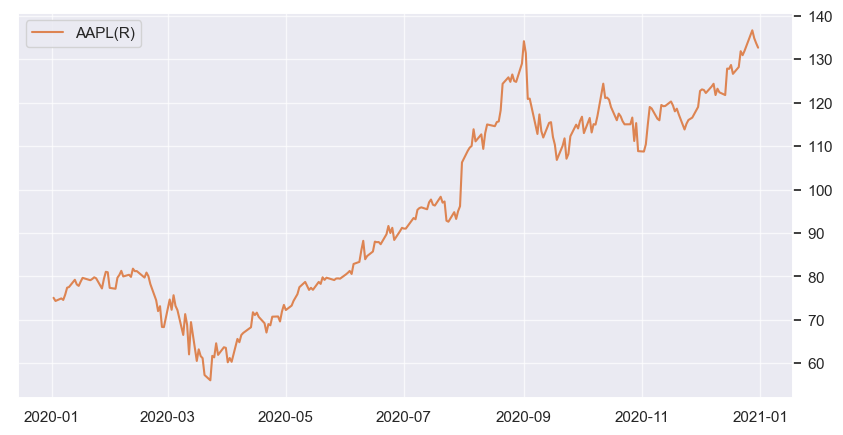

In [95]:
fs.draw_chart(df, right='AAPL')